# EDA

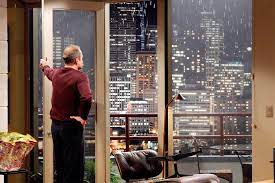

Import the basic libraries and set the pandas format for floats

In [17]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter

plt.rcParams.update(
    {"figure.figsize": (8, 5), "axes.facecolor": "white", "axes.edgecolor": "black"}
)
plt.rcParams["figure.facecolor"] = "w"
pd.plotting.register_matplotlib_converters()
pd.set_option("display.float_format", lambda x: "%.3f" % x)

Import the data from .csv file

In [18]:
df = pd.read_csv("data/eda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

### Clean data

In [19]:
df.drop(columns=["house_id", "id.1"], inplace=True)

rename columns

In [20]:
df.rename(
    columns={
        "yr_built": "year_built",
        "yr_renovated": "year_renovated",
        "long": "lon",
        "date": "sales_date",
    },
    inplace=True,
)
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'lon', 'sqft_living15', 'sqft_lot15', 'sales_date', 'price'],
      dtype='object')

In [21]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


check for duplicated rows

In [22]:
df.duplicated().value_counts()

False    21597
dtype: int64

In [23]:
df.dtypes

id                  int64
bedrooms          float64
bathrooms         float64
sqft_living       float64
sqft_lot          float64
floors            float64
waterfront        float64
view              float64
condition           int64
grade               int64
sqft_above        float64
sqft_basement     float64
year_built          int64
year_renovated    float64
zipcode             int64
lat               float64
lon               float64
sqft_living15     float64
sqft_lot15        float64
sales_date         object
price             float64
dtype: object

bring year_renovated to correct year by dividing by 10

In [24]:
df.year_renovated = df.year_renovated / 10

fill all NAN with -1 in the first place

In [25]:
df.year_renovated.fillna(-1, inplace=True)
df.waterfront.fillna(0, inplace=True)
df.sqft_basement.fillna(-1, inplace=True)
df.view.fillna(-1, inplace=True)

In [26]:
df = df.astype(
    {
        "bedrooms": np.int16,
        "view": np.int16,
        "condition": np.int16,
        "grade": np.int16,
        "year_built": np.int16,
        "year_renovated": np.int16,
        "zipcode": np.int32,
        "waterfront": bool,
    },
)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,0.000,1933,-1,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


add datetime to year_built, year_renovated, sales_date

In [27]:
df["renovated"] = df.year_renovated.apply(lambda x: True if x > 1 else False)
df.sales_date = pd.to_datetime(df.sales_date, format="%Y-%m-%d")
df["sales_year"] = df.sales_date.dt.year
df["sales_month"] = df.sales_date.dt.month
df["sales_day"] = df.sales_date.dt.day
df["sales_day_of_week"] = df.sales_date.dt.dayofweek
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lon,sqft_living15,sqft_lot15,sales_date,price,renovated,sales_year,sales_month,sales_day,sales_day_of_week
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,-122.257,1340.000,5650.000,2014-10-13,221900.000,False,2014,10,13,0
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,-122.319,1690.000,7639.000,2014-12-09,538000.000,True,2014,12,9,1
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,-122.233,2720.000,8062.000,2015-02-25,180000.000,False,2015,2,25,2
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,-122.393,1360.000,5000.000,2014-12-09,604000.000,False,2014,12,9,1
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,-122.045,1800.000,7503.000,2015-02-18,510000.000,False,2015,2,18,2


insert a few new columns

In [28]:
df["price_per_sqft_living"] = df.price / df.sqft_living
df["price_per_sqft_lot"] = df.price / df.sqft_lot
df["price_per_sqft_living15"] = df.price / df.sqft_living15
df["price_per_sqft_lot15"] = df.price / df.sqft_lot15
df["price_per_sqft_mean"] = df.price / df[
    [
        "price_per_sqft_living",
        "price_per_sqft_lot",
        "price_per_sqft_living15",
        "price_per_sqft_lot15",
    ]
].mean(axis=1)

# create bins for bedrooms
df["bedrooms_categories"] = pd.cut(
    df["bedrooms"],
    bins=[0, 2, 4, 6, 8, 10, 20, 50],
    labels=["1-2", "3-4", "5-6", "7-8", "9-10", "11-20", "20-50"],
)

In [29]:
df["affordable"] = df.price.apply(lambda x: True if x < 1000000 else False)
df_customer = df.query("affordable == True")

Text(0.5, 1.0, 'Distribution of price per lot qsft in neighbourhood count')

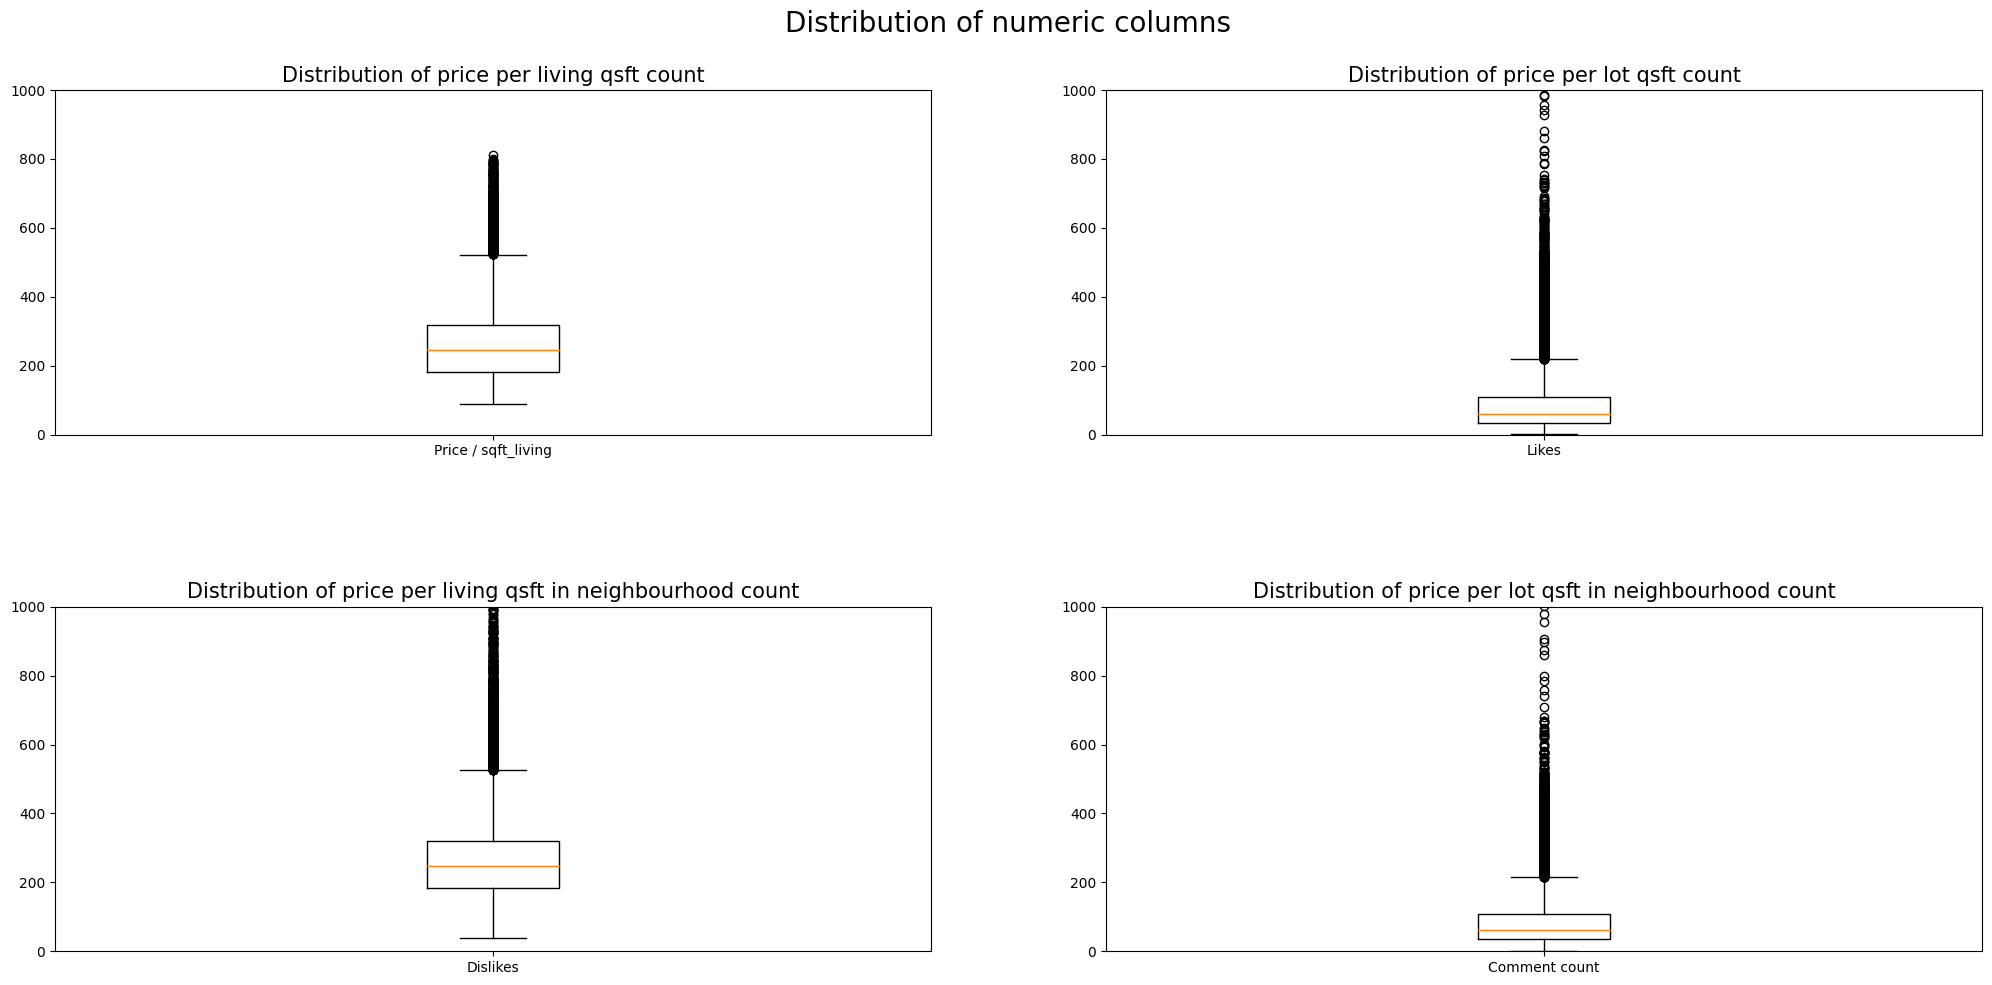

In [30]:
fig, ax = plt.subplots(
    2, 2, figsize=(20, 10)
)  # create subplots on 2 rows and 3 columns
plt.suptitle("Distribution of numeric columns", fontsize=20)
fig.tight_layout()  # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(
    hspace=0.5, wspace=0.2, top=0.9
)  # adjusts the space between the single subplots

ax[0][0].boxplot(x=df["price_per_sqft_living"])  # creates boxplot for number of views
ax[0][0].set_xticklabels(
    labels=["Price / sqft_living"]
)  # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0, 1000)  # limits the y-axis values from 0 to 2000000
ax[0][0].set_title("Distribution of price per living qsft count", fontsize=15)
# sets title for subplot

ax[0][1].boxplot(x=df["price_per_sqft_lot"])
ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_ylim(0, 1000)
ax[0][1].set_title("Distribution of price per lot qsft count", fontsize=15)

ax[1][0].boxplot(x=df["price_per_sqft_living15"])
ax[1][0].set_xticklabels(labels=["Dislikes"])
ax[1][0].set_ylim(0, 1000)
ax[1][0].set_title(
    "Distribution of price per living qsft in neighbourhood count", fontsize=15
)

ax[1][1].boxplot(x=df["price_per_sqft_lot15"])
ax[1][1].set_xticklabels(labels=["Comment count"])
ax[1][1].set_ylim(0, 1000)
ax[1][1].set_title(
    "Distribution of price per lot qsft in neighbourhood count", fontsize=15
)

Text(0.5, 1.0, 'Distribution of price per lot qsft in neighbourhood count')

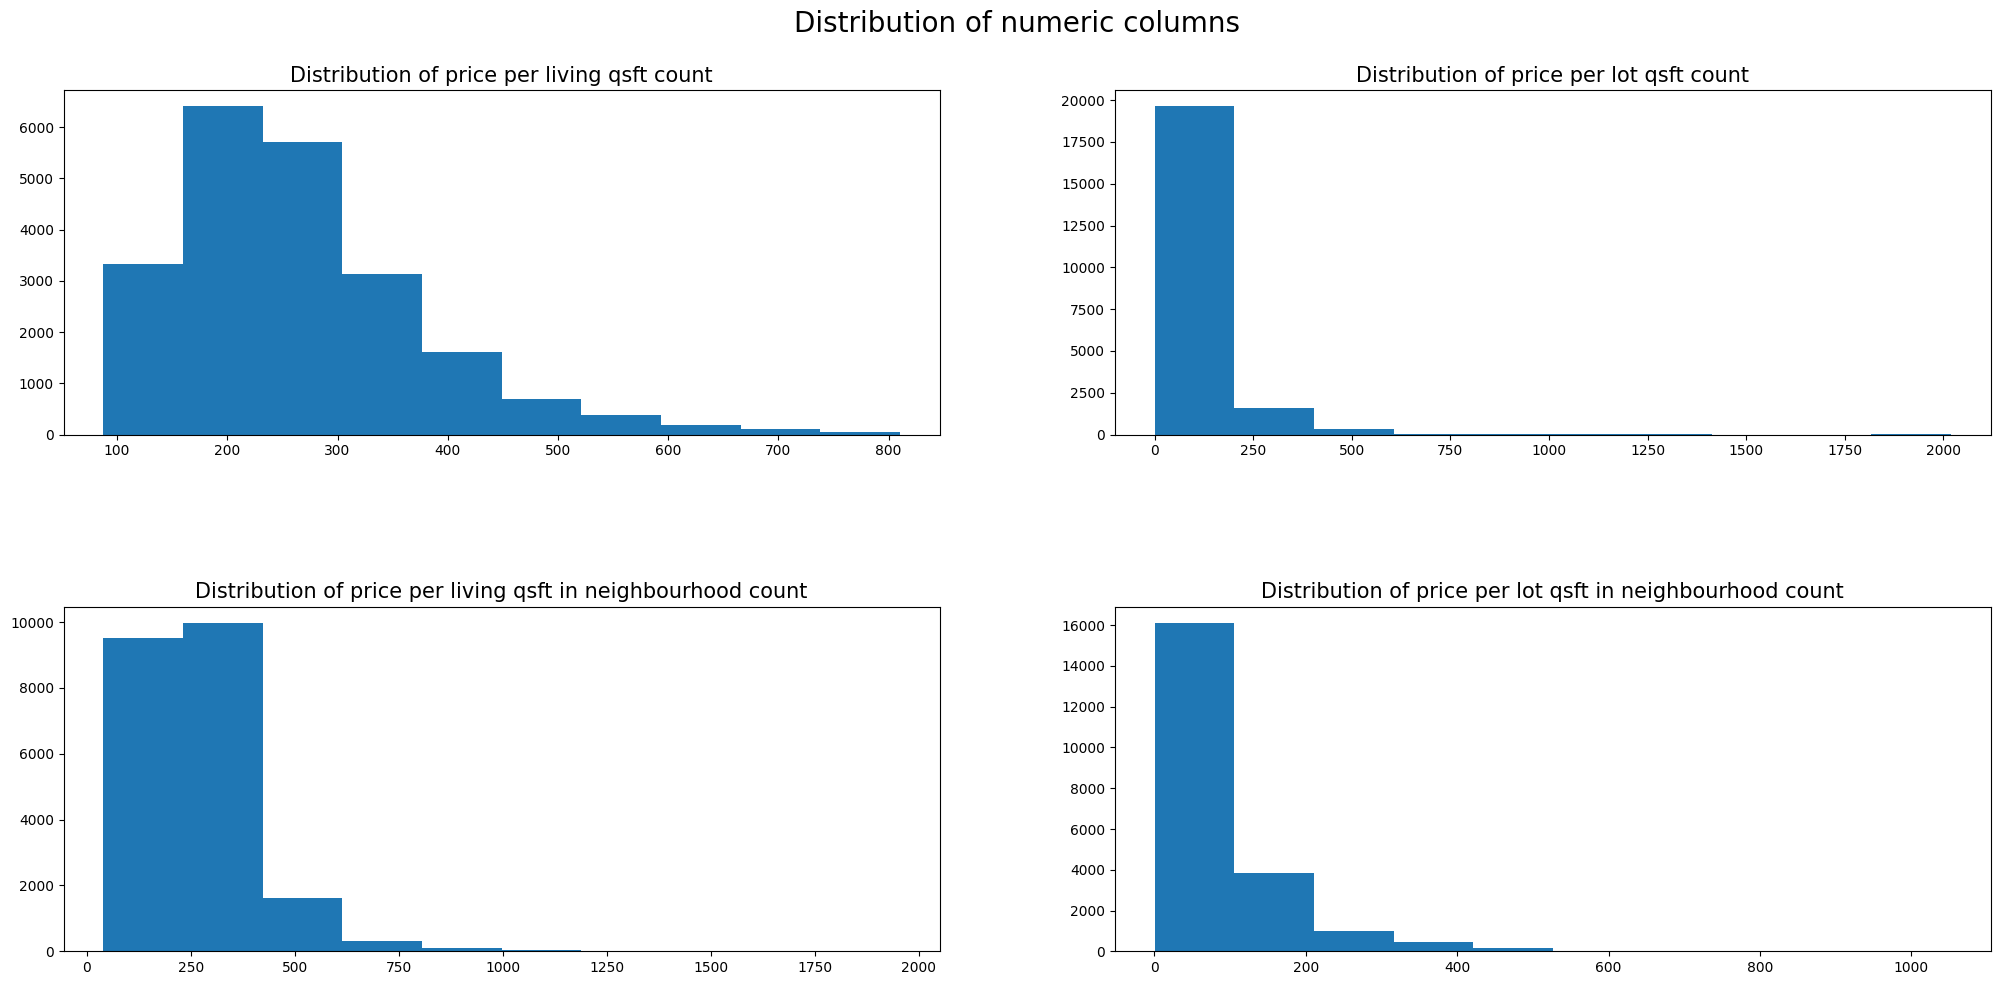

In [31]:
fig, ax = plt.subplots(
    2, 2, figsize=(20, 10)
)  # create subplots on 2 rows and 3 columns
plt.suptitle("Distribution of numeric columns", fontsize=20)
fig.tight_layout()  # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(
    hspace=0.5, wspace=0.2, top=0.9
)  # adjusts the space between the single subplots

ax[0][0].hist(x=df["price_per_sqft_living"])  # creates boxplot for number of views
# ax[0][0].set_xticklabels(labels=["Price / sqft_living"]) # sets the label for the ticks on the x-axis
ax[0][0].set_title("Distribution of price per living qsft count", fontsize=15)
# sets title for subplot

ax[0][1].hist(x=df["price_per_sqft_lot"])
##ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_title("Distribution of price per lot qsft count", fontsize=15)

ax[1][0].hist(x=df["price_per_sqft_living15"])
# ax[1][0].set_xticklabels(labels=["Dislikes"])
ax[1][0].set_title(
    "Distribution of price per living qsft in neighbourhood count", fontsize=15
)

ax[1][1].hist(x=df["price_per_sqft_lot15"])
# ax[1][1].set_xticklabels(labels=["Comment count"])
ax[1][1].set_title(
    "Distribution of price per lot qsft in neighbourhood count", fontsize=15
)

Distribution of price over sqft should 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

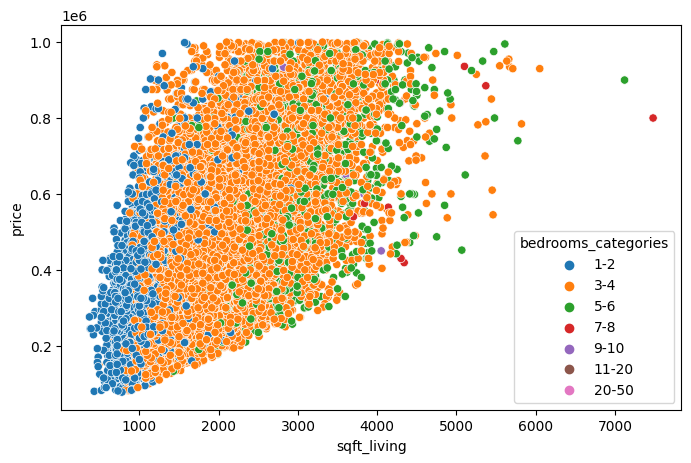

In [32]:
sns.scatterplot(data=df_customer, x="sqft_living", y="price", hue="bedrooms_categories")

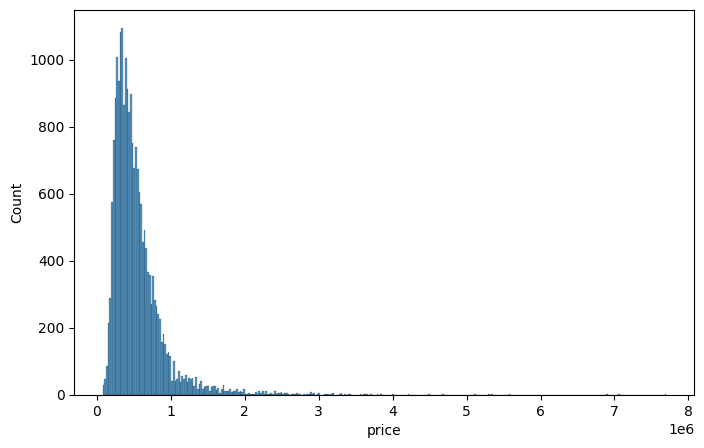

In [33]:
fig = sns.histplot(data=df, x="price")

my customer has no money: so I make a simple differentiation between high and low prices to look for:

<AxesSubplot:xlabel='bedrooms_categories', ylabel='price'>

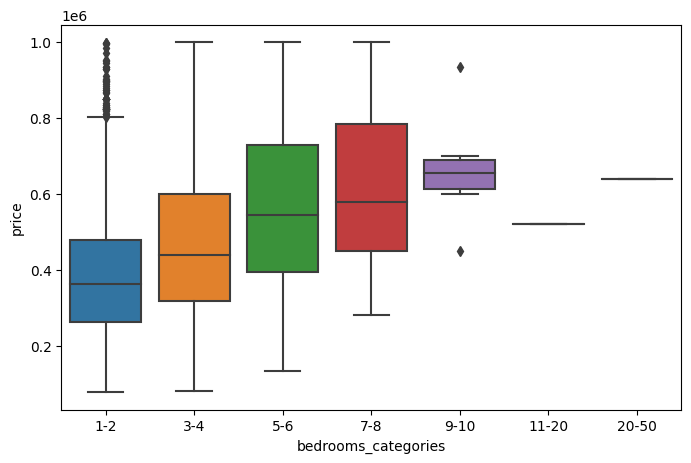

In [71]:
sns.boxplot(data=df_customer, y="price", x="bedrooms_categories")

# fig = sns.histplot(data=df_customer, x="price")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21597 non-null  int64         
 1   bedrooms                 21597 non-null  int16         
 2   bathrooms                21597 non-null  float64       
 3   sqft_living              21597 non-null  float64       
 4   sqft_lot                 21597 non-null  float64       
 5   floors                   21597 non-null  float64       
 6   waterfront               21597 non-null  bool          
 7   view                     21597 non-null  int16         
 8   condition                21597 non-null  int16         
 9   grade                    21597 non-null  int16         
 10  sqft_above               21597 non-null  float64       
 11  sqft_basement            21597 non-null  float64       
 12  year_built               21597 n

In [36]:
df_customer.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sales_month,sales_day,sales_day_of_week,price_per_sqft_living,price_per_sqft_lot,price_per_sqft_living15,price_per_sqft_lot15,price_per_sqft_mean,bedrooms_categories,affordable
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,10,13,0,188.051,39.274,165.597,39.274,2053.695,3-4,True
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,12,9,1,209.339,74.289,318.343,70.428,3200.482,3-4,True
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,2,25,2,233.766,18.000,66.176,22.327,2115.969,1-2,True
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,12,9,1,308.163,120.800,444.118,120.800,2430.875,3-4,True
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,2,18,2,303.571,63.119,283.333,67.973,2841.240,3-4,True


## Hypotheses
- 'price' and 'sqft_.' correlate and can be combined to a vareable price/mean(sqft_*)
- a whealthy area is not supposed to fit the needs of the customer
- there is a time in the year when prices drop and houses are cheap
- houses not renovated are cheaper

## Correlation of sqft

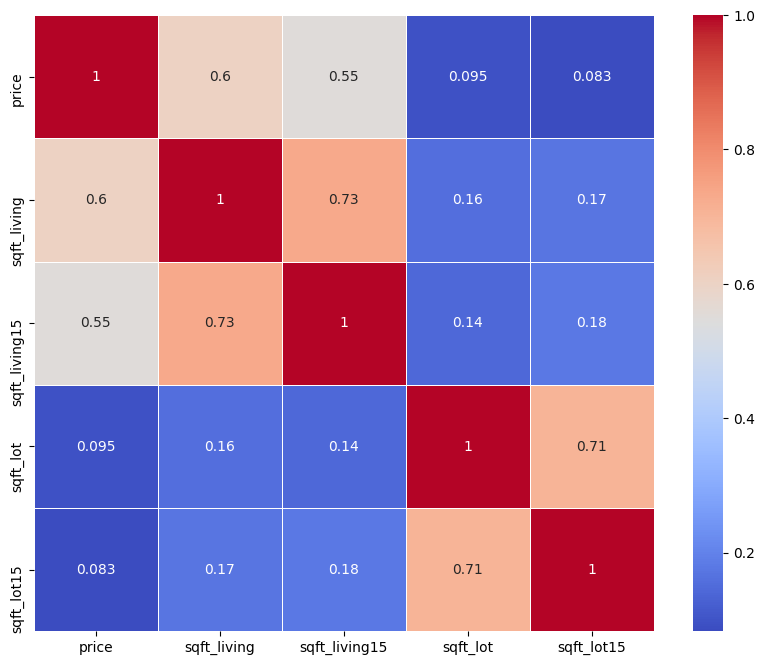

In [37]:
# draw the heatmap
plt.figure(figsize=(10, 8))
corr = df_customer[
    ["price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15"]
].corr()
ax = sns.heatmap(corr, linewidths=0.5, annot=True, cmap="coolwarm")

### Plot mean price per square footage for living space per zipcode

In [38]:
df_zipcodes = (
    df.groupby("zipcode")["lat", "lon", "price_per_sqft_living", "price"]
    .median()
    .reset_index()
)

fig = px.scatter_mapbox(
    df_zipcodes,
    lat="lat",
    lon="lon",
    hover_name="zipcode",
    hover_data=["price"],
    color="price_per_sqft_living",
    size="price",
    zoom=9,
    width=800,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 10, "t": 10, "l": 10, "b": 10})
fig.show()

<AxesSubplot:xlabel='sales_month', ylabel='price'>

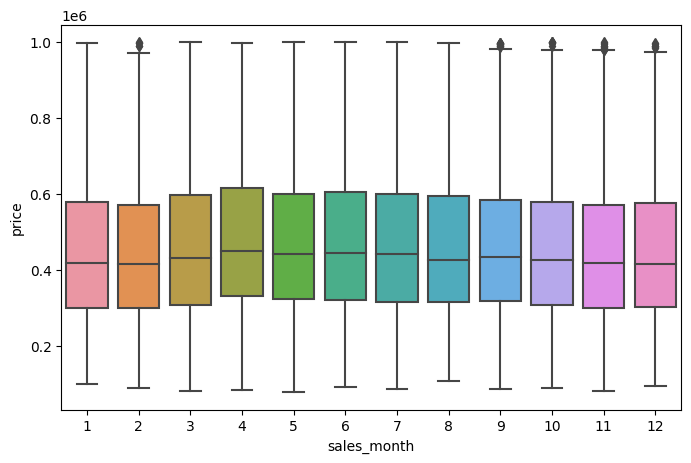

In [39]:
sns.boxplot(data=df_customer, x="sales_month", y="price")

It seems, that the price is relatet to the day of the week

<AxesSubplot:xlabel='sales_day_of_week', ylabel='price_per_sqft_living'>

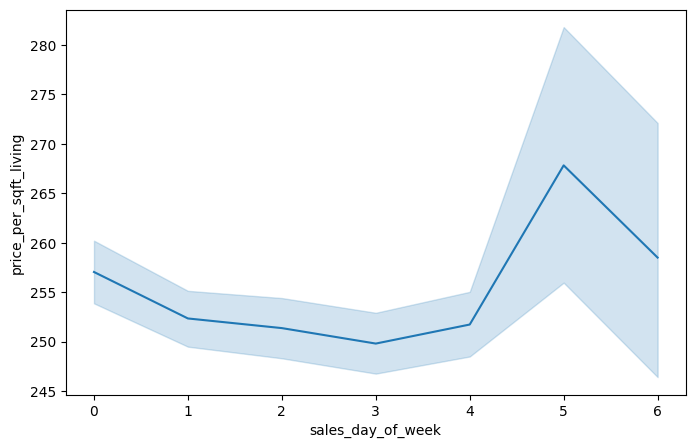

In [40]:
sns.lineplot(x=df_customer.sales_day_of_week, y=df_customer.price_per_sqft_living)

we want to find out, if the month in combination with the day of week plays a role

<AxesSubplot:xlabel='sales_day_of_week', ylabel='sales_month'>

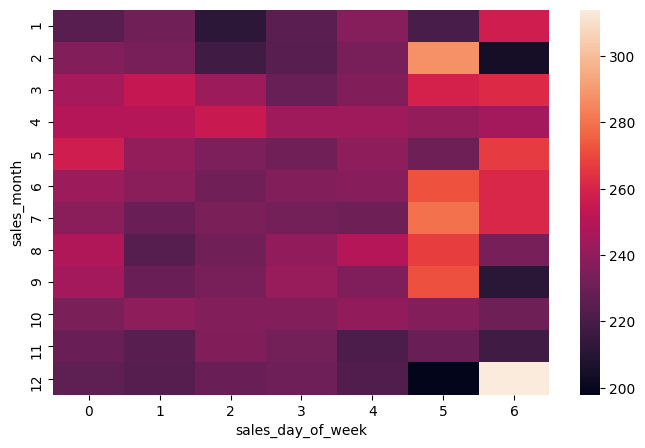

In [41]:
df_time_relation = (
    df_customer.groupby(["sales_month", "sales_day_of_week"])["price_per_sqft_living"]
    .median()
    .reset_index()
    .pivot(
        index="sales_month", columns="sales_day_of_week", values="price_per_sqft_living"
    )
)
sns.heatmap(
    df_time_relation,
)

holydays play a role for house sales: nope: the data suggest that week days are more important for the buyer

<AxesSubplot:xlabel='sales_day', ylabel='sales_month'>

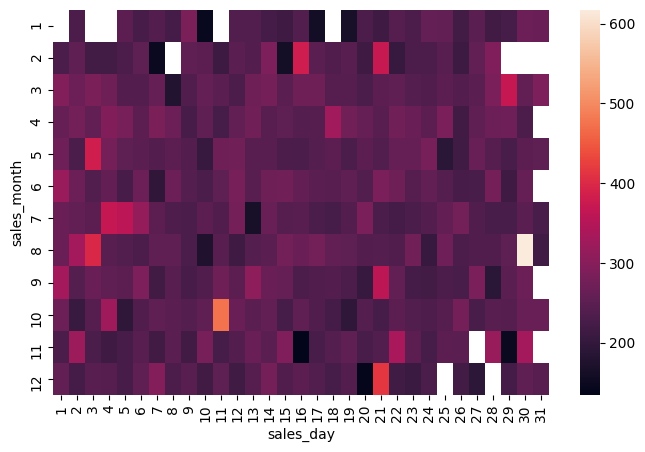

In [42]:
df_time_relation = (
    df.groupby(["sales_month", "sales_day"])["price_per_sqft_living"]
    .median()
    .reset_index()
    .pivot(index="sales_month", columns="sales_day", values="price_per_sqft_living")
)
sns.heatmap(
    df_time_relation,
)

Hypothesis: houses not renovated are cheaper

<AxesSubplot:xlabel='renovated', ylabel='price_per_sqft_living'>

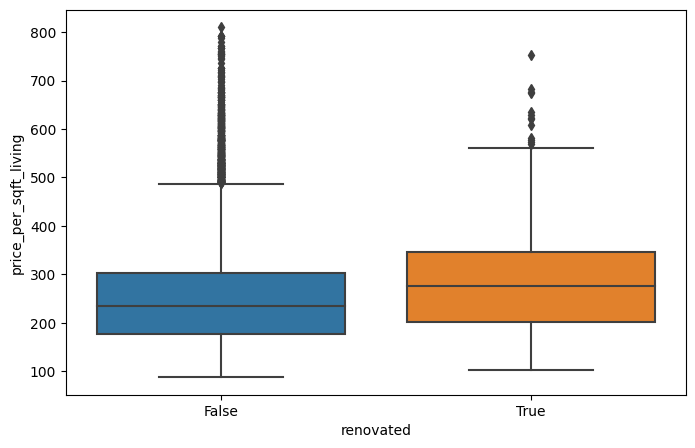

In [43]:
sns.boxplot(data=df_customer, x="renovated", y="price_per_sqft_living")

Cheap Houses with many bedrooms and small living area suppose do be affordable for customer

<AxesSubplot:xlabel='bedrooms', ylabel='sqft_living'>

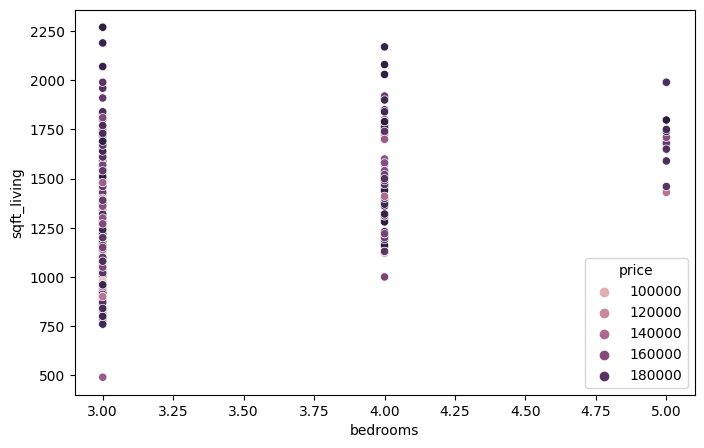

In [94]:
sns.scatterplot(data=df_houses_customer, x="bedrooms", y="sqft_living", hue="price")

<AxesSubplot:xlabel='bedrooms_categories', ylabel='price'>

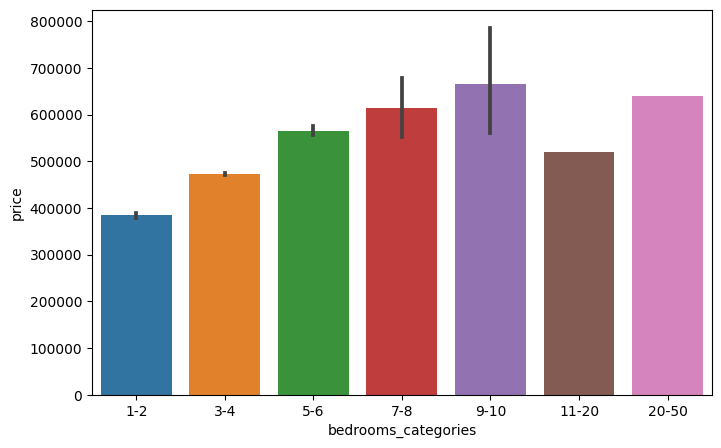

In [76]:
fig = sns.barplot(data=df_customer, y="price", x="bedrooms_categories")
fig

lets search areas where houses are which are nice for our customer

In [97]:
df_houses_customer = df_customer.query("2 < bedrooms < 6 and price < 200000")
fig = px.scatter_mapbox(
    df_houses_customer,
    lat="lat",
    lon="lon",
    hover_name="zipcode",
    hover_data=["price", "bedrooms", "renovated"],
    color="condition",
    size="price",
    zoom=9,
    width=800,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 10, "t": 10, "l": 10, "b": 10})
fig.show()

In [45]:
corr = df.corr("pearson")

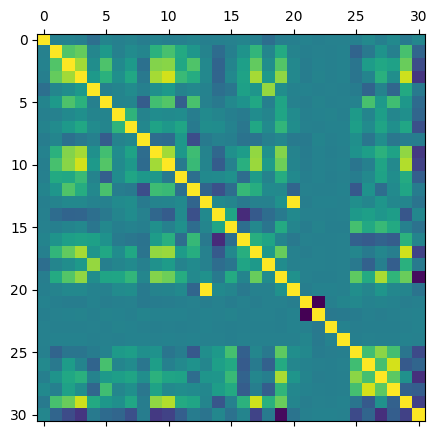

In [46]:
plt.matshow(df.corr())
plt.show()

In [47]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'lon', 'sqft_living15', 'sqft_lot15', 'sales_date', 'price',
       'renovated', 'sales_year', 'sales_month', 'sales_day',
       'sales_day_of_week', 'price_per_sqft_living', 'price_per_sqft_lot',
       'price_per_sqft_living15', 'price_per_sqft_lot15',
       'price_per_sqft_mean', 'bedrooms_categories', 'affordable'],
      dtype='object')